<a href="https://colab.research.google.com/github/ivangd97/bioinspirada_CNN/blob/master/Copy_of_Entrega_bioinspirada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VERSIÓN DE KERAS
Importamos la librería y mostramos la versión

In [0]:
import keras
keras.__version__

'2.2.5'

# DISPOSITIVOS
Mostramos la lista de dispositivos a los que tenemos acceso

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8888526697990284222
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2459890871952089764
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15802886893135190555
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15956161332
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9226873941271535764
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


# DATASET Y REDIMENSIONAMIENTO
Descargaremos el dataset de cifar10 que se incluye en keras, a continuación dividiremos todas las imágenes en las que servirán para entrenar el modelo y las que utilizaremos para la validación del conocimiento adquirido.

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print (train_images.shape)
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32 , 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#data aumentation
#datagen = ImageDataGenerator(
    #rota entre 0 y 180 (lo que pongamos) aleatoriamente las imagenes
#    rotation_range = 90,
    #aleatoriamente da zoom
    #zoom_range = 2.0,
    #width_shift_range=0.1, 
    #height_shift_range=0.1,
    #aleatoriamente da la vuelta a las imagenes
#    horizontal_flip = True,  
#    vertical_flip = True,
    #el porcentaje (entre 0 y 1) de imagenes usadas para validacion
#    validation_split = 0.1)

#datagen.fit(train_images)

print(train_images.shape)


170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 32, 32, 3)


# MODELO DE LA RED NEURONAL

Podemos observar la división de capas convolucionales con su correspondiente capa de *MaxPooling2D* posterior, a continuación una capa de *Flatten* y, por último, las capas densas que realizan la categorización de las imágenes. A continuación se explica un poco el funcionamiento de cada una de las capas utilizadas:

- *Conv2D* : Crea un núcleo de convolución con la capa de entrada para producir un tensor de salidas. Si el bias es 1, el vector de bias se crea y añade a la salida.
- *MaxPooling2D* : Una capa de maxpooling de (2,2) como tenemos abajo recorrerá las imágenes píxel por píxel pero en vez de tomar sólo uno, cogerá una ventana de 2x2 (4 píxeles).
- *Flatten* : Convierte la matriz de entrada en un array plano (vector).
- *Dropout* : Eliminamos parte del conocimiento adquirido por la capa previa de manera aleatoria, 0,1 es equivalente a un 10%.
- *Dense* : Son capas fully connected que se encuentran generalmente al final de la red y realizan la categorización.

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
#el 10 es el numero de kernels y (5,5) el tamaño de éstos
#input_shape es el tamaño de cada dato del dataset (tamaño de la imagen)
#encoder
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.2))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 512)         1180160   
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 512)        

# VISUALIZACIÓN DEL DATASET
Aquí vamos a realizar una salida por pantalla de las imágenes del dataset con su correspondiente salida numérica de la red.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  """


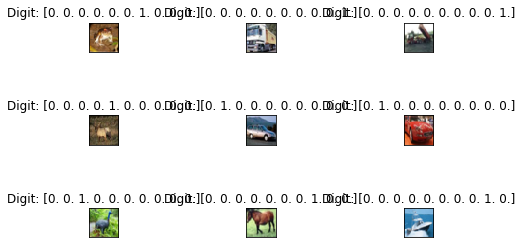

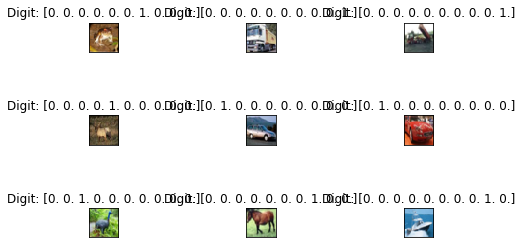

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

# ENTRENAMIENTO DE LA RED

Dado que el *data aumentation* no reportaba una tasa de aprendizaje en validación que subiese del 50%, se ha tratado de modificar los valores del *batch_size* pese a sufrir un tiempo de entrenamiento elevado (las pruebas con *batch_size* más alto y más épocas reportaban tasas en validación del 76/77%).

La ejecución del entrenamiento con *data aumentation* se encuentra comentada encima.

In [0]:
batch_size = 5
epochs = 17

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#ejecución de entrenamiento con data aumentation
#history=model.fit_generator(datagen.flow(train_images, train_labels,
#          batch_size=batch_size),
#          epochs=epochs,validation_data=(test_images, test_labels),
#          verbose=1
#          )
#para hacer autoencoder train_labels se debe cambiar por train_images y test_labels por test_images

history=model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,validation_data=(test_images, test_labels),
          verbose=1
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/17
50000/50000 [==============================] - 55s 1ms/step - loss: 1.8002 - acc: 0.3344 - val_loss: 1.4256 - val_acc: 0.4774
Epoch 2/17
50000/50000 [==============================] - 56s 1ms/step - loss: 1.2962 - acc: 0.5327 - val_loss: 1.1141 - val_acc: 0.6057
Epoch 3/17
50000/50000 [==============================] - 54s 1ms/step - loss: 1.0279 - acc: 0.6377 - val_loss: 0.8958 - val_acc: 0.6867
Epoch 4/17
50000/50000 [==============================] - 55s 1ms/step - loss: 0.8374 - acc: 0.7058 - val_loss: 0.8759 - val_acc: 0.6960
Epoch 5/17
50000/50000 [==============================] - 55s 1ms/step - loss: 0.6975 - acc: 0.7571 - val_loss: 0.7328 - val_acc: 0.7514
Epoch 6/17
50000/50000 [==============================] - 55s 1ms/step - loss: 0.5923 - acc: 0.7930 - val_loss: 0.7063 - val_acc: 0.7594
Epoch 7/17
50000/50000 [==============================] - 55s 1ms/step - loss: 0.4991 - acc: 0.8267 - val_loss: 0.6880 - val_acc

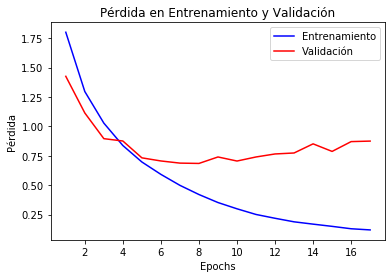

In [0]:
import matplotlib.pyplot as plt
ent_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(ent_loss) + 1)

plt.plot(epochs, ent_loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

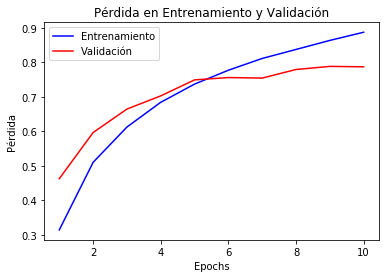

In [0]:
import matplotlib.pyplot as plt

ent_loss = history.history['acc']
val_loss = history.history['val_acc']

epochs = range(1, len(ent_loss) + 1)

plt.plot(epochs, ent_loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()